# Erasmus Q-Intelligence


## Extra exercise on topics 01 - 04 (Introduction - Advanced Graphics)

In this exercise we use the dataset 'gapminder' from 'gapminder.csv'. It is an excerpt of the Gapminder data on life expectancy, GDP per capita, and population by country.

### Q1 - Introduction
a) Open this notebook in jupyter. Make sure you save this script to a convenient place (not 'Downloads'!). Further, save the data 'gapminder.csv' from Canvas in the same working directory.

b) Import the module pandas with the alias pd, which is needed to import data from a .csv-file

In [38]:
import pandas as pd

c) Load the dataset 'gapminder' from 'gapminder.csv'.

In [39]:
gapminder = pd.read_csv("gapminder.csv")

### Q2 - Descriptives
a) Use the function head(), tail() and describe() to get a second view on your data. Change the number of rows shown in head() and tail().

In [40]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [41]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [42]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


b) Use a function to get the number of rows and columns in the dataset.

In [43]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


c) Show in a table how many observations there are by continent. Next, show in a two-way table how many observations there are by continent, by year. Check the help-file of pd.crosstab() if needed.

In [44]:
gapminder["continent"].value_counts()

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

In [45]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False
) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.

    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.

    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row ar

In [46]:
pd.crosstab(gapminder["continent"], gapminder["year"])

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,52,52,52,52,52,52,52,52,52,52,52,52
Americas,25,25,25,25,25,25,25,25,25,25,25,25
Asia,33,33,33,33,33,33,33,33,33,33,33,33
Europe,30,30,30,30,30,30,30,30,30,30,30,30
Oceania,2,2,2,2,2,2,2,2,2,2,2,2


d) Get a view on the distribution of life expectancy by showing the following set of quantiles: c(0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1). What does it tell you?

In [47]:
gapminder["lifeExp"].quantile([0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

0.00    23.59900
0.01    33.49260
0.05    38.49240
0.10    41.51080
0.25    48.19800
0.50    60.71250
0.75    70.84550
0.90    75.09700
0.95    77.43700
0.99    80.23892
1.00    82.60300
Name: lifeExp, dtype: float64

e) Get the correlation matrix of the numeric variables in the dataset. Elaborate on the correlation between lifeExp and gdpPercap. (use .select_dtypes(include='number') to remove non number columns)

In [48]:
gapminder.select_dtypes(include='number').corr()

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


A flaw in the above investigations is that we have observations over the years, and now take them all together. It would be interesting to see differences over the years: something for the next exercises of visualization and of a later topic in the course (05_Data-Wrangling).

### Q3 - Graphics
a) Get a third view of the data by using the function plot() on the dataset. Use the Zoom-button to see that it is still not very informative.

<Axes: >

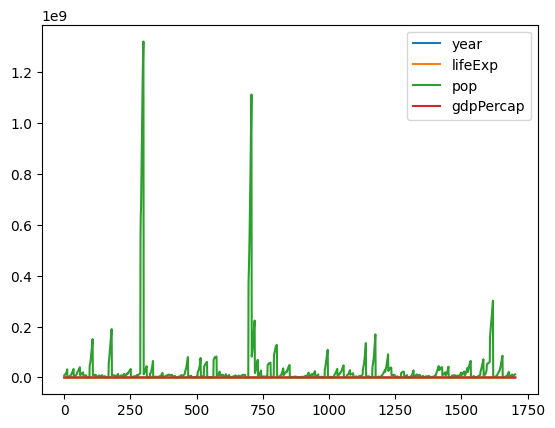

In [49]:
gapminder.plot()

b) Load the module matplotlib to make your own visualizations.

In [50]:
import matplotlib.pyplot as plt

c) Visualize the relation between GDP per capita and life expectancy in a scatter plot using ggplot2.

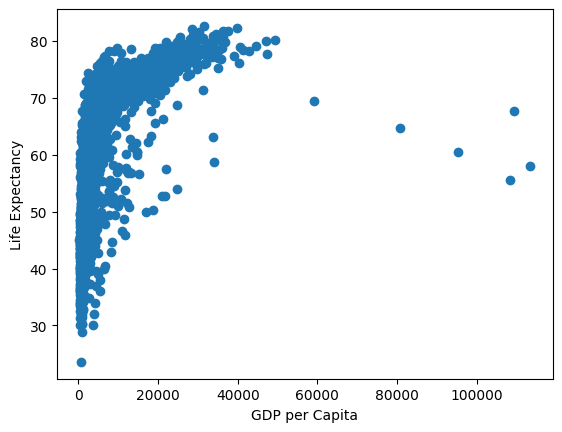

In [51]:
plt.scatter(data=gapminder, x="gdpPercap", y="lifeExp")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.show()

d) Visualize the distribution of life expectancy using a boxplot and differentiate over year. Interpret the visualization.

<Axes: xlabel='year', ylabel='lifeExp'>

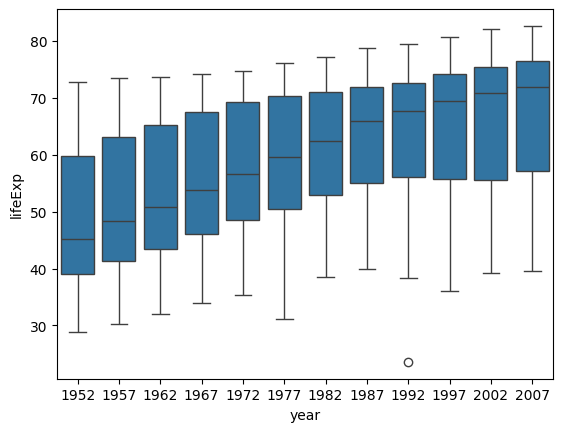

In [52]:
import seaborn as sns
sns.boxplot(data=gapminder, x="year", y="lifeExp")

e) Visualize the distribution of GDP per capita using a histogram. Play with the number of bins.

<Axes: xlabel='gdpPercap', ylabel='Count'>

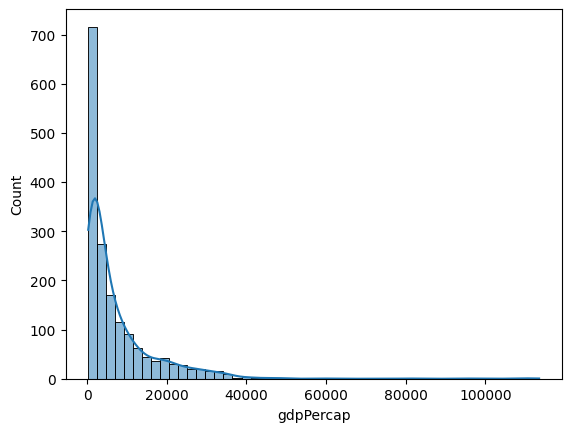

In [53]:
sns.histplot(data=gapminder, x="gdpPercap", bins=50, kde=True)

The distribution of GDP per capita is very skewed. Visualize a log-transformation instead to find a clearer view, not only on the extreme outliers. For this log-transformation, we need the numpy-module; use this code:
<br> 
import numpy as np
<br>
in your plot use: x=np.log(gapminder["gdpPercap"]),

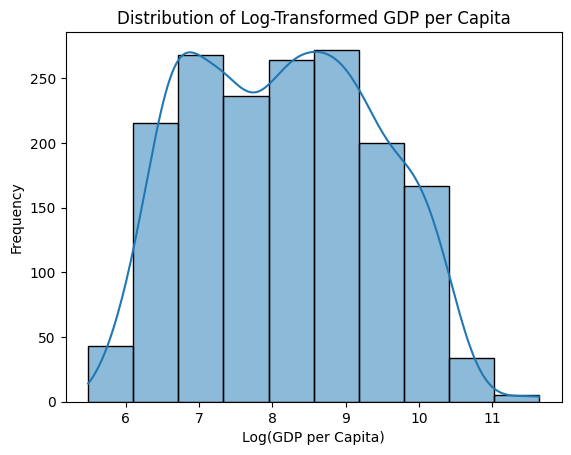

In [58]:
import numpy as np

# Log-transformed histogram of GDP per capita
sns.histplot(x=np.log(gapminder["gdpPercap"]), bins=10, kde=True)
plt.xlabel("Log(GDP per Capita)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed GDP per Capita")
plt.show()

### Q4 - Advanced Graphics
a) We continue with the visualization from 3c). Visualize the relation between GDP per capita and life expectancy in a scatter plot using seaborn. Given what we found in 3e), use log(gdpPercap) instead of gdpPercap. Change the shape of the points to 'o', the color of the dots to red and the edge to black, choose an other-than-default transparency, change the x-label to 'logarithm of GDP per capita (in US dollars)' and the y-label to 'life expectancy (in years)'.

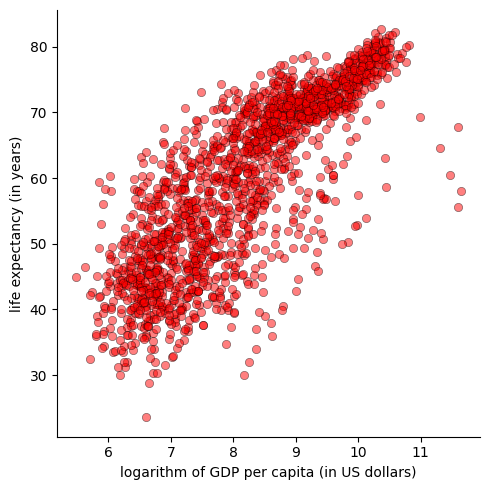

In [62]:
sns.relplot(data=gapminder, x=np.log(gapminder["gdpPercap"]), y="lifeExp", marker="o", color="red", edgecolors="black", alpha=0.5)
plt.xlabel("logarithm of GDP per capita (in US dollars)")
plt.ylabel("life expectancy (in years)")
plt.show()

b) We continue with the visualization from 4a). Make the color of the dots dependent on continent and use your own manual colors (not the default). Play with transparency to clearify your plot. Make edgecolors to be 'white'.

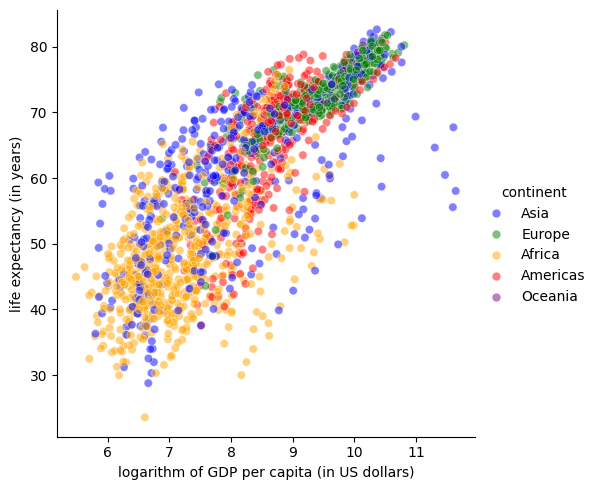

In [66]:
sns.relplot(data=gapminder, x=np.log(gapminder["gdpPercap"]), y="lifeExp", marker="o", color="red", edgecolors="white", alpha=0.5, hue="continent", palette=["blue", "green", "orange", "red", "purple"])
plt.xlabel("logarithm of GDP per capita (in US dollars)")
plt.ylabel("life expectancy (in years)")
plt.show()

c) We continue with the visualization from 3d). Visualize the distribution of life expectancy using a boxplot and differentiate over year. Add a title to the plot and update the x- and y-labels.Next, update the y-axis, having breaks 30-35-40-...-80.   

Tip:
1. set_yticks
2. set_ylim

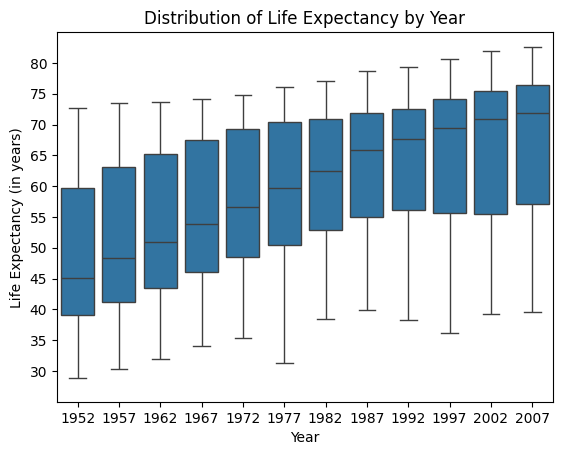

In [55]:
sns.boxplot(data=gapminder, x="year", y="lifeExp")

# Add title and labels
plt.title("Distribution of Life Expectancy by Year")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in years)")

# Set y-axis breaks from 30 to 80 in steps of 5
ax = plt.gca()
ax.set_yticks(range(30, 85, 5))  # 30, 35, 40, ..., 80
ax.set_ylim(25, 85)  # Set limits slightly wider to show all data

plt.show()

d) **EXTRA** Instead of a boxplot, where a lot of information is lost, we can create a violinplot. Look for the helpfile of [sns.violinplot](https://python-graph-gallery.com/violin-plot/). Visualize life expectancy over year, using only 1957, 1982 and 2007 (otherwise, the final visualization will be too full). Using the following code:
<br>
gapminder_filtered = gapminder[gapminder['year'].isin([1957, 1982, 2007])]
<br>
<br>
You need to transform your data to wider, as is done in Advanced Graphics, the eredivisie-plot. (gapminder.pivot()) 
What do you see from this visualization?

<Axes: xlabel='year', ylabel='lifeExp'>

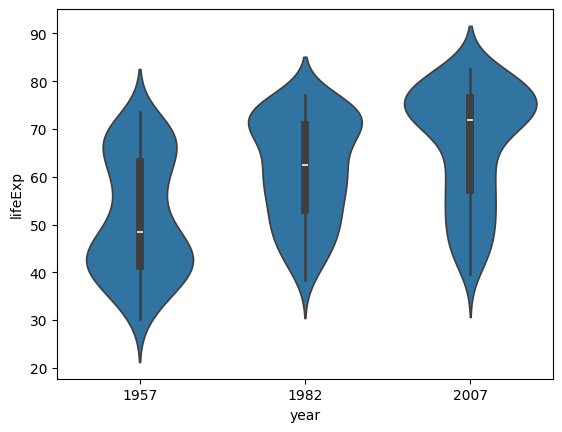

In [56]:
gapminder_filtered = gapminder[gapminder['year'].isin([1957, 1982, 2007])]
sns.violinplot(x=gapminder_filtered["year"], y=gapminder_filtered["lifeExp"])

Make the same violinplot, but then in subplots by continent. What can you conclude from the visualization?

### Q5 - Data Wrangling

a) Using the original gapminder dataset. Filter only the observations for continent Europe, drop the column lifeExp and create a new column which represents GDP (not being GDP per capita)

In [82]:
gapminder = pd.read_csv("gapminder.csv")
# this makes it so every pandas dataframe shows E-nrs as normal numbers 
pd.options.display.float_format = '{:.0f}'.format

gapminder_filtered = gapminder.query("continent == 'Europe'")
gapminder_filtered = gapminder_filtered.filter(["country", "year", "gdpPercap", "pop", "continent"])
gapminder_filtered = gapminder_filtered.assign(gdp = gapminder_filtered["gdpPercap"] * gapminder_filtered["pop"])
gapminder_filtered


,country,year,gdpPercap,pop,continent,gdp
12,Albania,1952,1601,1282697,Europe,2053669902
13,Albania,1957,1942,1476505,Europe,2867792398
14,Albania,1962,2313,1728137,Europe,3996988985
15,Albania,1967,2760,1984060,Europe,5476396323
16,Albania,1972,3313,2263554,Europe,7500110047
...,...,...,...,...,...,...
1603,United Kingdom,1987,21665,56981620,Europe,1234494698393
1604,United Kingdom,1992,22705,57866349,Europe,1313860808997
1605,United Kingdom,1997,26075,58808266,Europe,1533397976044
1606,United Kingdom,2002,29479,59912431,Europe,1766158504920


b) Only for Netherlands, create a column which shows the five-yearly increase or decrease in gdpPercap. You want to use netherlands['gdpPercap'] - netherlands['gdpPercap'].shift(1). This gets the difference between the current row and the previous row, our data is already in intervals of 5 years. Make sure your data is ordered by year before using this shift-function! Visualise the newly created column in a simple time series.

          country  year  gdpPercap  gdpPercap_change
1080  Netherlands  1952       8942               NaN
1081  Netherlands  1957      11276              2335
1082  Netherlands  1962      12791              1515
1083  Netherlands  1967      15363              2572
1084  Netherlands  1972      18795              3431
1085  Netherlands  1977      21209              2414
1086  Netherlands  1982      21399               190
1087  Netherlands  1987      23651              2252
1088  Netherlands  1992      26791              3140
1089  Netherlands  1997      30246              3455
1090  Netherlands  2002      33725              3479
1091  Netherlands  2007      36798              3073


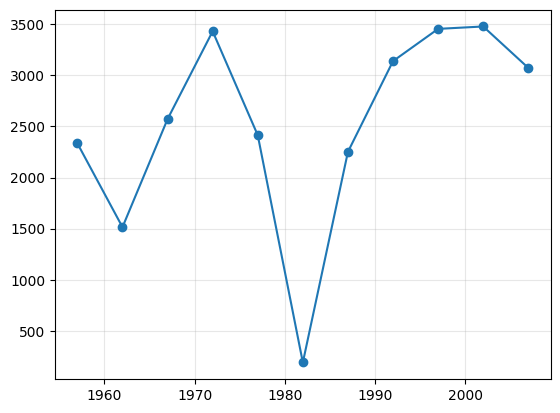

In [90]:
# Filter for Netherlands only and sort by year
netherlands = gapminder[gapminder['country'] == 'Netherlands'].sort_values('year')

# Create a column showing the five-yearly change in gdpPercap
# we use shift(1) because the data is in 5-year intervals
netherlands['gdpPercap_change'] = netherlands['gdpPercap'] - netherlands['gdpPercap'].shift(1)

# Display the result
print(netherlands[['country', 'year', 'gdpPercap', 'gdpPercap_change']])

# Create a simple time series plot
plt.plot(netherlands['year'], netherlands['gdpPercap_change'], marker="o")

plt.grid(True, alpha=0.3)
plt.show()

c) Get, for all countries, the increase in lifeExp from the beginning till the end of the dataset. Which country increased most? Get a subset of countries which had a decrease in lifeExp. Use first and last in your aggregation.

In [96]:
gapminderlifeexp = gapminder.groupby("country").agg(
    lifeexp_first=("lifeExp", "first"),  # First observation (beginning)
    lifeexp_last=("lifeExp", "last")     # Last observation (end)
)
gapminderlifeexp['lifeexp_change'] = gapminderlifeexp['lifeexp_last'] - gapminderlifeexp['lifeexp_first']
gapminderlifeexp.sort_values('lifeexp_change', ascending=False).head(10)

,lifeexp_first,lifeexp_last,lifeexp_change
country,,,
Oman,38,76,38
Vietnam,40,74,34
Indonesia,37,71,33
Saudi Arabia,40,73,33
Libya,43,74,31
"Korea, Rep.",47,79,31
Nicaragua,42,73,31
West Bank and Gaza,43,73,30
"Yemen, Rep.",33,63,30


### d
 Get, only for 2007, for each continent, the highest the lowest life expectancy. 
### d bonus:
 Get, only for 2007, for each continent, the country with the highest and the country with the lowest life expectancy. Tip: You need idxmin & idxmax and merge two datasets
 

In [105]:
# Filter for 2007 data only
data_2007 = gapminder.query("year == 2007")

# For each continent, find the country with min and max life expectancy
continent_extremes = data_2007.loc[data_2007.groupby('continent')['lifeExp'].idxmin()][['continent', 'country', 'lifeExp']].rename(columns={'country': 'country_min', 'lifeExp': 'lifeExp_min'})
continent_max = data_2007.loc[data_2007.groupby('continent')['lifeExp'].idxmax()][['continent', 'country', 'lifeExp']].rename(columns={'country': 'country_max', 'lifeExp': 'lifeExp_max'})

# Merge the results
result = continent_extremes.merge(continent_max, on='continent')
result

,continent,country_min,lifeExp_min,country_max,lifeExp_max
0,Africa,Swaziland,40,Reunion,76
1,Americas,Haiti,61,Canada,81
2,Asia,Afghanistan,44,Japan,83
3,Europe,Turkey,72,Iceland,82
4,Oceania,New Zealand,80,Australia,81


In [106]:
gapminder2017 = gapminder.query("year == 2007").groupby("continent").agg(
    lifeexp_min=("lifeExp", "min"),  # Minimum life expectancy
    lifeexp_max=("lifeExp", "max")   # Maximum life expectancy
)

gapminder2017

,lifeexp_min,lifeexp_max
continent,,
Africa,40,76
Americas,61,81
Asia,44,83
Europe,72,82
Oceania,80,81


### Q6 - Functions, Iteration and Conditions

a) Write a function get_vis(data, nation, var) which creates the time series of 'var' for a given 'nation'. Use an if-statement to:
- print an informative warning if the given 'nation' is not in 'data'
- print an informative warning if 'var' is not a numeric column in 'data' 
if nation and var are OK, the plot should be made (and if not OK, the plot should not be made!)
if both 'nation' and 'var' are incorrect, 2 messages should be printed.

b) Iterate the function from a) over a set of 5 countries (chosen by you) for var = lifeExp

c) Write a function get_avg_lifeExp(data, countries) which calculates the average lifeExp by year of the countries given in the vector 'countries'. The function should return the averages by year of the countries known in the data and print a warning message containing those countries in the given vector which are not in the data. If none of the given countries is available, this should give a warning as well (and no averages).
HINT: you probably might want to use data-wrangling-functions in this question.

d) Execute get_avg_lifeExp() on a set of 5 countries (chosen by you)

e) BONUS: Get a list countries_by_alphabet from A-Z with all countries in list-element A, B, C ... based on the first letter of the country name

f) BONUS: Iterate get_avg_lifeExp() over the list countries_by_alphabet. From the resulting list of data.frames, get (again by iterating) the average lifeExp in 2007 and store those in a vector. What is striking?